# Capstone Project

The goal of this project is to predict the Stock Prices using the sock market price data in the pass to create some useful models. To accomplish this goal, there are a few steps need to be done

        1. Load the dataset
        2. Visualize the dataset
        3. Readjust the dataset
        4. Define the Features and Labels
        5. Create the Training and Testing sets
        6. Evaluate Algorithms
        7. Make Prediction 

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import cluster, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import pairwise_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing, cross_validation, svm
#from sklearn.svm import SVC
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import math, datetime
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

/Users/ajinthchristudas/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# load the dataset into pandas
data =pd.read_csv('GOOGL_ascend.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/10/2017,1043.869995,1046.630005,1041.219971,1044.150024,1044.150024,969600
1,11/9/2017,1048.000000,1050.880005,1035.849976,1047.719971,1047.719971,1794600
2,11/8/2017,1050.050049,1062.689941,1047.050049,1058.290039,1058.290039,1213800
3,11/7/2017,1049.650024,1053.410034,1043.000000,1052.390015,1052.390015,1305200
4,11/6/2017,1049.099976,1052.589966,1042.000000,1042.680054,1042.680054,914700


In [3]:
#head of the data 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/10/2017,1043.869995,1046.630005,1041.219971,1044.150024,1044.150024,969600
1,11/9/2017,1048.000000,1050.880005,1035.849976,1047.719971,1047.719971,1794600
2,11/8/2017,1050.050049,1062.689941,1047.050049,1058.290039,1058.290039,1213800
3,11/7/2017,1049.650024,1053.410034,1043.000000,1052.390015,1052.390015,1305200
4,11/6/2017,1049.099976,1052.589966,1042.000000,1042.680054,1042.680054,914700


In [4]:
# # Tail of the data 
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3328,8/25/2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188600
3329,8/24/2004,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
3330,8/23/2004,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3331,8/20/2004,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
3332,8/19/2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659000


In [5]:
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

         Date         Open         High          Low        Close  \
0  11/10/2017  1043.869995  1046.630005  1041.219971  1044.150024   
1   11/9/2017  1048.000000  1050.880005  1035.849976  1047.719971   
2   11/8/2017  1050.050049  1062.689941  1047.050049  1058.290039   
3   11/7/2017  1049.650024  1053.410034  1043.000000  1052.390015   
4   11/6/2017  1049.099976  1052.589966  1042.000000  1042.680054   

     Adj Close   Volume  
0  1044.150024   969600  
1  1047.719971  1794600  
2  1058.290039  1213800  
3  1052.390015  1305200  
4  1042.680054   914700  

 Data Types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [6]:
# # find more information about the data to see if there is any categorical and numerical.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
Date         3333 non-null object
Open         3333 non-null float64
High         3333 non-null float64
Low          3333 non-null float64
Close        3333 non-null float64
Adj Close    3333 non-null float64
Volume       3333 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [7]:
# # check to see if there is null values in the dataset
data.isnull().sum().sum()

0

In [8]:
# This step will allow to visualize the data by colling 
# data.describe for all propose measures.
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03
mean,390.183026,393.568093,386.404378,390.050760,390.050760,7.983930e+06
std,235.035794,236.274195,233.550729,235.036518,235.036518,8.297274e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,5.206000e+05
25%,228.958954,231.161163,226.396393,228.738739,228.738739,2.596900e+06
50%,296.281281,298.488495,293.643646,295.905914,295.905914,5.221100e+06
75%,550.390015,554.780029,545.500000,549.489990,549.489990,1.047210e+07
max,1050.050049,1063.619995,1047.050049,1058.290039,1058.290039,8.215110e+07


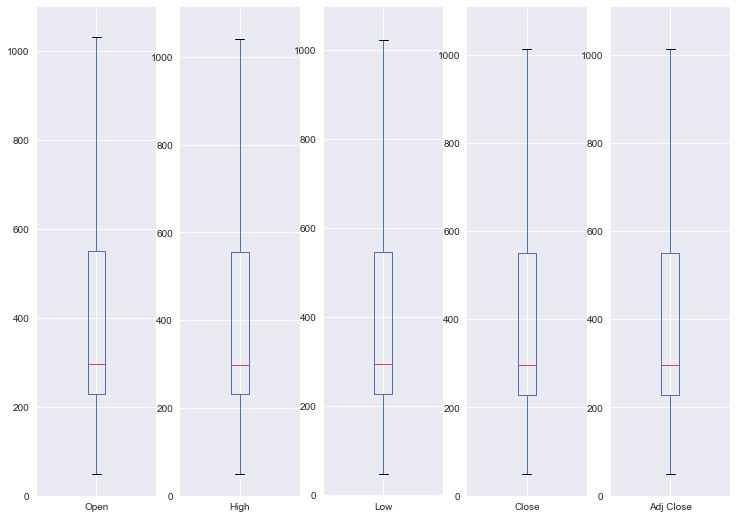

In [9]:
# # this boxplot will help to visualize the data for all columns in dataset
data[[col for col in data.columns if col != 'Volume']].plot(kind='box', subplots=True, layout=(1,6), sharex=False, sharey=False)
plt.show()

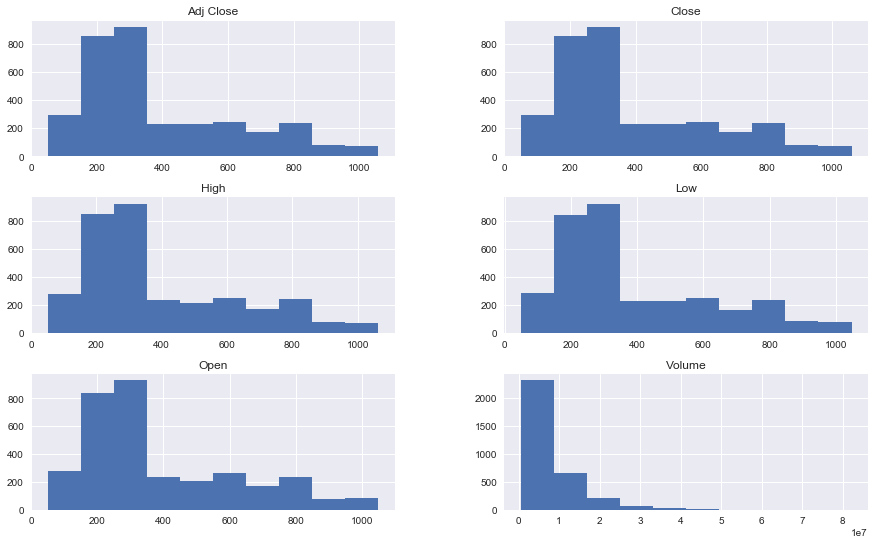

In [10]:
data.hist()
plt.show()

In [11]:
#Instead of looking at low and high let's take the percentage between them to create new columns

In [12]:
df = data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/10/2017,1043.869995,1046.630005,1041.219971,1044.150024,1044.150024,969600
1,11/9/2017,1048.000000,1050.880005,1035.849976,1047.719971,1047.719971,1794600
2,11/8/2017,1050.050049,1062.689941,1047.050049,1058.290039,1058.290039,1213800
3,11/7/2017,1049.650024,1053.410034,1043.000000,1052.390015,1052.390015,1305200
4,11/6/2017,1049.099976,1052.589966,1042.000000,1042.680054,1042.680054,914700


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
Date         3333 non-null object
Open         3333 non-null float64
High         3333 non-null float64
Low          3333 non-null float64
Close        3333 non-null float64
Adj Close    3333 non-null float64
Volume       3333 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [14]:
df= df[['Date','Open','High','Low','Close','Adj Close','Volume']]


In [15]:
df['OC_change']= (df['Close']-df['Open'])/df['Open']* 100.0

In [16]:
df['HL_Change'] = (df['High']-df['Low'])/df['Low']* 100.0

In [17]:
df =df[['Date', 'Close','OC_change','HL_Change','Volume']]

In [18]:
#df =df[['Close','OC_change','HL_Change','Volume']]

In [19]:
df.head(3)
df.shape

(3333, 5)

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.set_index('Date',inplace=True)

In [22]:
#df['label']

In [23]:
df.head(10)

,Close,OC_change,HL_Change,Volume
Date,,,,
2017-11-10,1044.150024,0.026826,0.519586,969600
2017-11-09,1047.719971,-0.026720,1.450985,1794600
2017-11-08,1058.290039,0.784724,1.493710,1213800
2017-11-07,1052.390015,0.261039,0.998086,1305200
2017-11-06,1042.680054,-0.611946,1.016312,914700
2017-11-03,1049.989990,0.694317,1.253796,1388500
2017-11-02,1042.969971,0.286539,1.639024,1334700
2017-11-01,1042.599976,0.605993,1.340424,2163100
2017-10-31,1033.040039,0.003876,1.432325,1516300


In [24]:
df.describe()

,Close,OC_change,HL_Change,Volume
count,3333.000000,3333.000000,3333.000000,3.333000e+03
mean,390.050760,-0.022184,2.156212,7.983930e+06
std,235.036518,1.509251,1.445170,8.297274e+06
min,50.055054,-9.179759,0.386373,5.206000e+05
25%,228.738739,-0.746972,1.252325,2.596900e+06
50%,295.905914,-0.016783,1.775112,5.221100e+06
75%,549.489990,0.753995,2.577571,1.047210e+07
max,1058.290039,8.759763,17.438183,8.215110e+07


In [25]:
df['Close'].autocorr(lag=10)

0.99619985953744705

Populating the interactive namespace from numpy and matplotlib


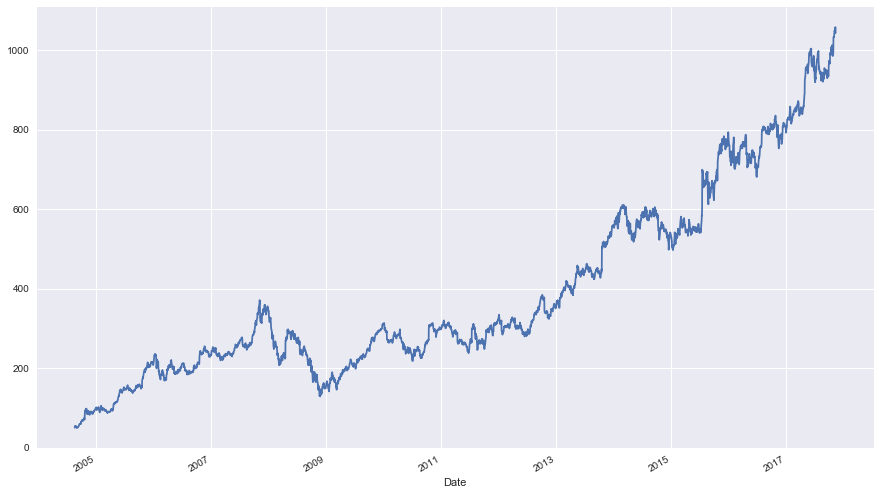

In [26]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
df["Close"].plot(grid = True) # Plot the adjusted closing price of Google



In [27]:
df.dropna(inplace=True)

In [28]:
df.head(10)

,Close,OC_change,HL_Change,Volume
Date,,,,
2017-11-10,1044.150024,0.026826,0.519586,969600
2017-11-09,1047.719971,-0.026720,1.450985,1794600
2017-11-08,1058.290039,0.784724,1.493710,1213800
2017-11-07,1052.390015,0.261039,0.998086,1305200
2017-11-06,1042.680054,-0.611946,1.016312,914700
2017-11-03,1049.989990,0.694317,1.253796,1388500
2017-11-02,1042.969971,0.286539,1.639024,1334700
2017-11-01,1042.599976,0.605993,1.340424,2163100
2017-10-31,1033.040039,0.003876,1.432325,1516300


In [29]:
forecast_col = 'Close'
df.fillna(-999, inplace =True)

forecast_out = int(math.ceil(0.01 * len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

In [30]:
#print(df['label'])

In [31]:
df.tail()

,Close,OC_change,HL_Change,Volume,label
Date,,,,,
2004-08-25,53.053055,0.990858,3.966113,9188600,NaN
2004-08-24,52.487488,-5.726354,7.753204,15247300,NaN
2004-08-23,54.754753,-1.218966,4.062356,18256100,NaN
2004-08-20,54.209209,7.227004,8.537309,22834300,NaN
2004-08-19,50.220219,0.340000,8.441017,44659000,NaN


In [32]:
df.dropna(inplace=True)

In [33]:
df.tail()

,Close,OC_change,HL_Change,Volume,label
Date,,,,,
2004-10-13,70.520523,-1.688530,2.477162,19766200,53.053055
2004-10-12,68.768768,2.201728,3.155914,11665500,52.487488
2004-10-11,67.697701,-1.270063,3.742995,10472100,54.754753
2004-10-08,68.933937,-0.713661,1.941331,11069500,54.209209
2004-10-07,69.494492,1.409582,2.438663,14115000,50.220219


In [34]:
df.describe()

,Close,OC_change,HL_Change,Volume,label
count,3299.000000,3299.000000,3299.000000,3.299000e+03,3299.000000
mean,393.483824,-0.030461,2.138849,7.944175e+06,383.704560
std,233.785372,1.494964,1.430341,8.291687e+06,227.711637
min,67.697701,-9.179759,0.386373,5.206000e+05,50.055054
25%,231.016022,-0.746011,1.250114,2.570200e+06,227.765259
50%,297.282288,-0.017717,1.761762,5.174800e+06,294.134125
75%,551.159973,0.745755,2.548862,1.044740e+07,546.619995
max,1058.290039,8.759763,17.438183,8.215110e+07,1004.280029


In [35]:
X=np.array(df.drop(['label'], 1))
y =np.array(df['label'])

In [36]:
print(len(X),len(y))

3299 3299


In [37]:
#df['Date'] = pd.to_datetime(df['Date'])

In [38]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2) 

In [39]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
confidence =clf.score(X_test, y_test)

In [42]:
print(confidence)

0.976976420136


In [43]:
X =X[:-forecast_out:]

In [44]:
   X_lately = X[-forecast_out:]

In [45]:
forecast_set = clf.predict(X_lately )

In [46]:
print(forecast_set)

[  95.10819009   98.05218595  100.00042635   88.0914244   108.13986106
   92.61915403  107.14322708   84.24680184  112.21386333   99.38378382
   92.97206091   93.15762975   91.25991317   92.79451928   93.18217037
   98.21699524   88.54921893   81.61770595   85.60712569   74.91882334
   87.14470833   90.73889378   91.80733175   83.01197829   87.14012009
   98.67945149   95.05530914   87.83054399   85.94928254   84.7573769
   80.22438387   84.50841971   85.98486964   69.81385874]


In [47]:
df['Forecast']= np.nan
df.head()

,Close,OC_change,HL_Change,Volume,label,Forecast
Date,,,,,,
2017-11-10,1044.150024,0.026826,0.519586,969600,934.280029,NaN
2017-11-09,1047.719971,-0.026720,1.450985,1794600,943.260010,NaN
2017-11-08,1058.290039,0.784724,1.493710,1213800,947.549988,NaN
2017-11-07,1052.390015,0.261039,0.998086,1305200,947.539978,NaN
2017-11-06,1042.680054,-0.611946,1.016312,914700,936.859985,NaN


In [48]:
last_date = df.iloc[-1].name
last_unix = (last_date - datetime.datetime(1970,1,1)).total_seconds()
last_unix = last_date.timestamp()

one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [49]:
#df.Forecast

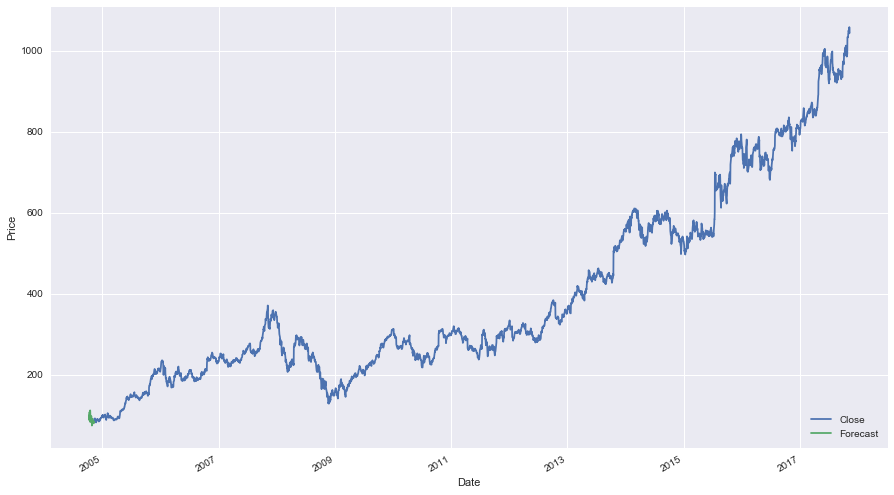

In [50]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long-Sort Term Memory Model
In this section we will use LSTM to train and test on our data set.

Basic LSTM Model
First lets make a basic LSTM model.

Step 1 : import keras libraries for smooth implementaion of lstm

In [51]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

data = pd.read_csv('GOOGL_ascend.csv')
data.drop('Adj Close', axis = 1, inplace=True)
data.head()
# display(stocks.head())

Using TensorFlow backend.
/Users/ajinthchristudas/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


,Date,Open,High,Low,Close,Volume
0,11/10/2017,1043.869995,1046.630005,1041.219971,1044.150024,969600
1,11/9/2017,1048.000000,1050.880005,1035.849976,1047.719971,1794600
2,11/8/2017,1050.050049,1062.689941,1047.050049,1058.290039,1213800
3,11/7/2017,1049.650024,1053.410034,1043.000000,1052.390015,1305200
4,11/6/2017,1049.099976,1052.589966,1042.000000,1042.680054,914700


In [52]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

Sept 2. Split train and test data sets and Unroll train and test data for lstm model

In [53]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item       Open      Close    Volume
0     0  50.050049  50.220219  44659000
1     1  50.555557  54.209209  22834300
2     2  55.430431  54.754753  18256100
3     3  55.675674  52.487488  15247300
4     4  52.532532  53.053055   9188600
---
      Item         Open        Close   Volume
3328  3328  1049.099976  1042.680054   914700
3329  3329  1049.650024  1052.390015  1305200
3330  3330  1050.050049  1058.290039  1213800
3331  3331  1048.000000  1047.719971  1794600
3332  3332  1043.869995  1044.150024   969600


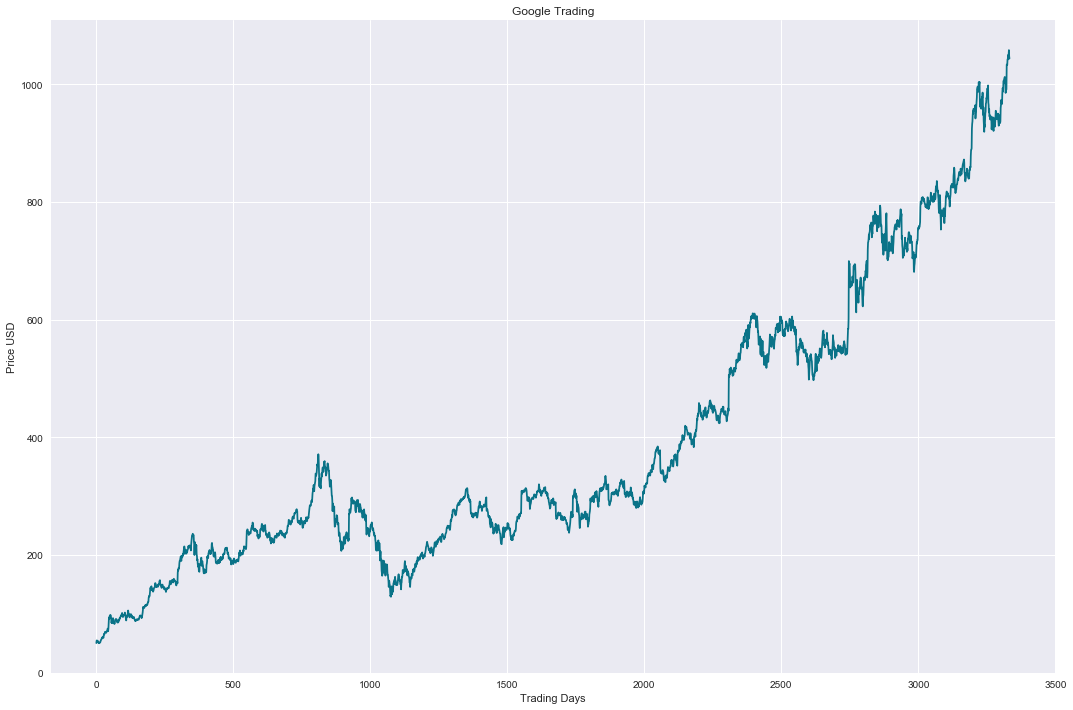

In [54]:
import visualize

visualize.plot_basic(stocks)

In [55]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.000405  0.000164  0.540710
1     1  0.000911  0.004120  0.273350
2     2  0.005783  0.004661  0.217266
3     3  0.006029  0.002413  0.180407
4     4  0.002887  0.002974  0.106186


Open   --- mean : 0.3404003803285802   	 Std:  0.23490530066390317   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.337218714929733   	 Std:  0.2330818311636676   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.09142820138280806   	 Std:  0.10162903260808981   	 Max:  1.0   	 Min:  0.0


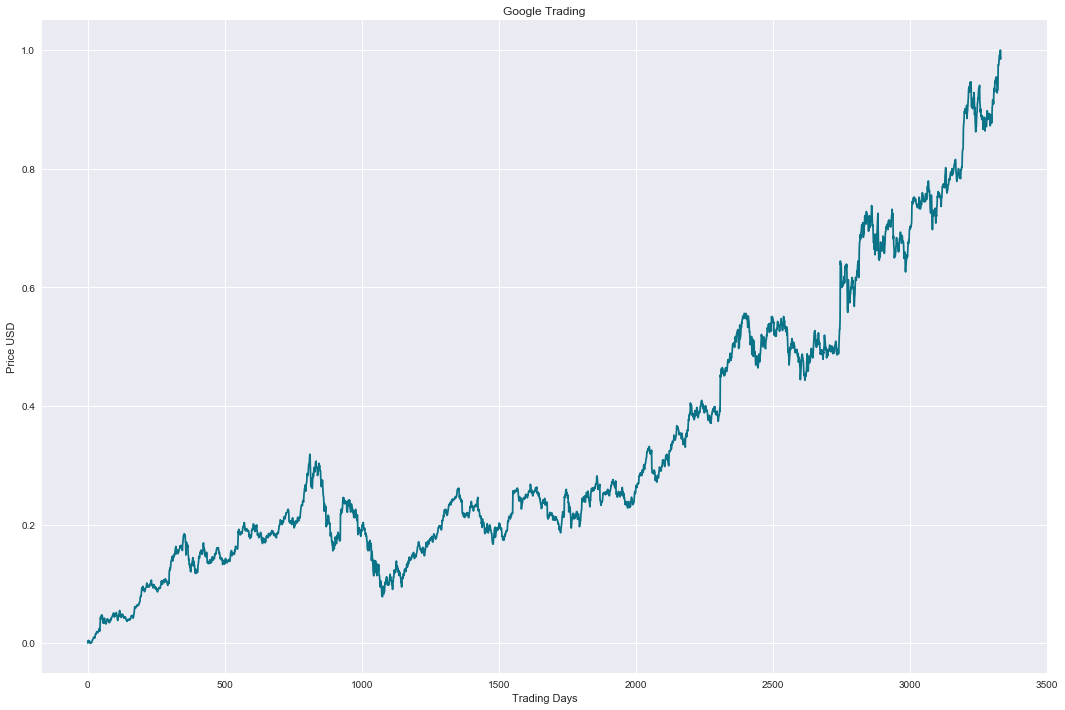

In [56]:
visualize.plot_basic(stocks)

In [57]:
stocks.to_csv('google_preprocessed.csv',index= False)

In [58]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.000405,0.000164,0.540710
1,1,0.000911,0.004120,0.273350
2,2,0.005783,0.004661,0.217266
3,3,0.006029,0.002413,0.180407
4,4,0.002887,0.002974,0.106186


In [59]:

X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2284, 1)
y_train (2284, 1)
x_test (1049, 1)
y_test (1049, 1)


In [60]:

model = LinearRegressionModel.build_model(X_train,y_train)

In [61]:

predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

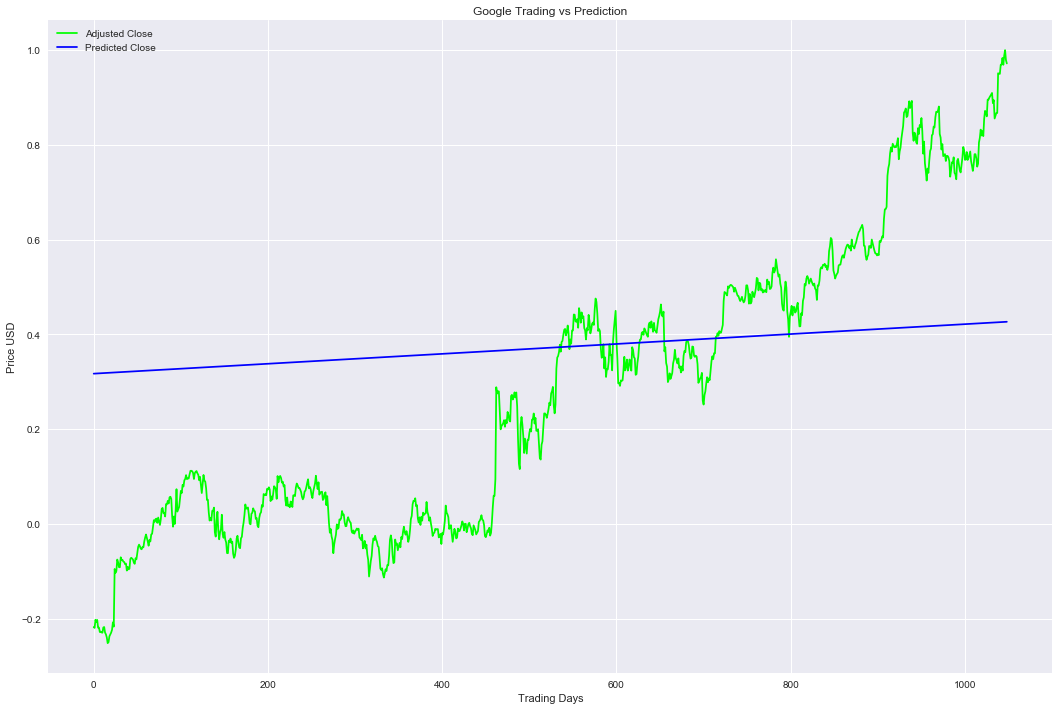

In [62]:

vs.plot_prediction(y_test,predictions)

In [63]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.1594 MSE (0.3993 RMSE)
Test Score: 0.08258876 MSE (0.28738259 RMSE)


In [64]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.000405,0.000164,0.540710
1,0.000911,0.004120,0.273350
2,0.005783,0.004661,0.217266
3,0.006029,0.002413,0.180407
4,0.002887,0.002974,0.106186


In [65]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2777, 50, 3)
y_train (2777,)
x_test (446, 50, 3)
y_test (446,)


In [66]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.08378124237060547


In [67]:
model.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=1,
    validation_split=0.05)

Train on 2638 samples, validate on 139 samples
Epoch 1/1
2638/2638 [==============================] - 209s 79ms/step - loss: 8.0882e-04 - val_loss: 0.0021


In [68]:

predictions = model.predict(X_test)

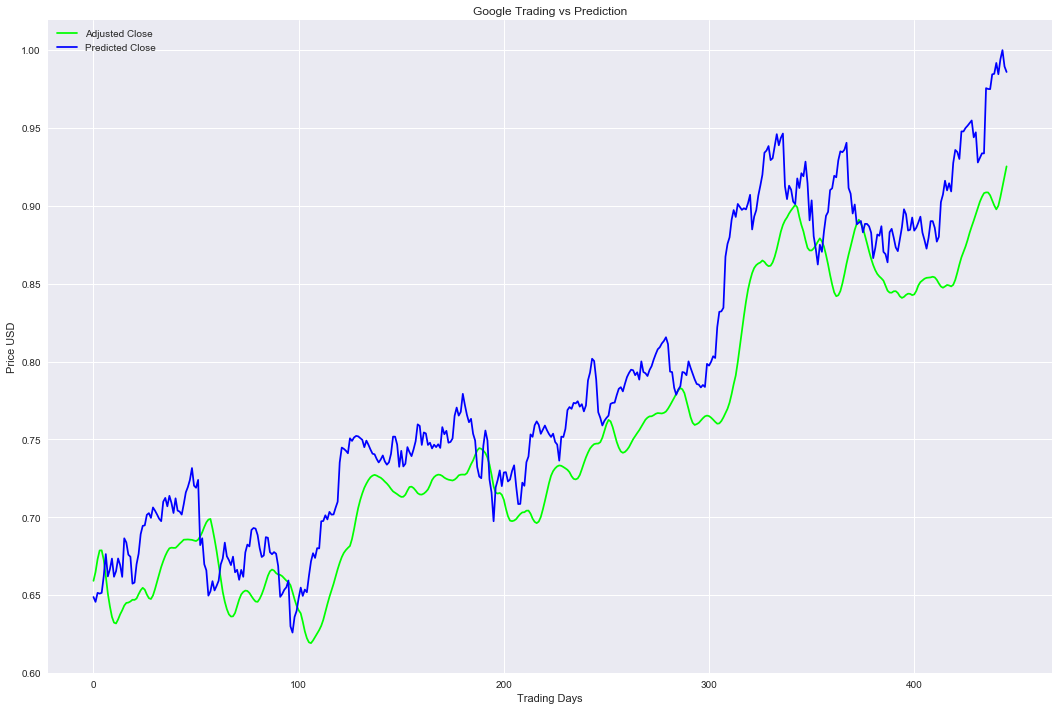

In [69]:

vs.plot_lstm_prediction(predictions, y_test)

In [70]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00062694 MSE (0.02503867 RMSE)
Test Score: 0.00178683 MSE (0.04227092 RMSE)


In [71]:
# Set up hyperparameters
batch_size = 512
epochs = 20

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.049566030502319336


In [72]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 2638 samples, validate on 139 samples
Epoch 1/20
 - 5s - loss: 0.0292 - val_loss: 0.0122
Epoch 2/20
 - 3s - loss: 0.0049 - val_loss: 0.0303
Epoch 3/20
 - 4s - loss: 0.0040 - val_loss: 0.0068
Epoch 4/20
 - 3s - loss: 0.0015 - val_loss: 0.0014
Epoch 5/20
 - 3s - loss: 0.0010 - val_loss: 0.0073
Epoch 6/20
 - 4s - loss: 0.0011 - val_loss: 0.0019
Epoch 7/20
 - 3s - loss: 8.7204e-04 - val_loss: 0.0019
Epoch 8/20
 - 3s - loss: 7.9695e-04 - val_loss: 0.0040
Epoch 9/20
 - 3s - loss: 8.0058e-04 - val_loss: 0.0016
Epoch 10/20
 - 3s - loss: 7.1259e-04 - val_loss: 0.0026
Epoch 11/20
 - 4s - loss: 6.9118e-04 - val_loss: 0.0022
Epoch 12/20
 - 5s - loss: 6.6671e-04 - val_loss: 0.0018
Epoch 13/20
 - 4s - loss: 6.4467e-04 - val_loss: 0.0021
Epoch 14/20
 - 3s - loss: 6.4281e-04 - val_loss: 0.0019
Epoch 15/20
 - 3s - loss: 6.0178e-04 - val_loss: 0.0019
Epoch 16/20
 - 3s - loss: 6.0030e-04 - val_loss: 0.0016
Epoch 17/20
 - 3s - loss: 5.8795e-04 - val_loss: 0.0017
Epoch 18/20
 - 3s - loss: 5.8622e-

In [73]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

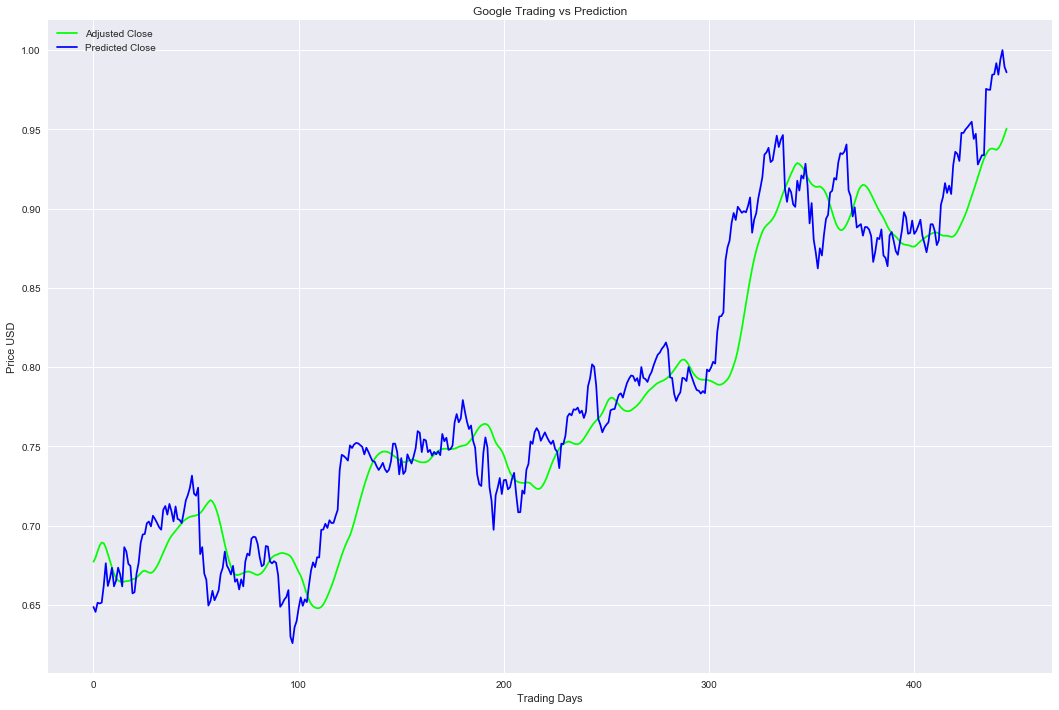

In [75]:

vs.plot_lstm_prediction(predictions, y_test)

In [76]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00033662 MSE (0.01834716 RMSE)
Test Score: 0.00082415 MSE (0.02870801 RMSE)


In [77]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)

Delta Price: 0.000824 - RMSE * Adjusted Close Range


In [78]:
import preprocess_data as ppd

data = pd.read_csv('GOOGL_ascend.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].as_matrix()
Y = stocks[:]['Close'].as_matrix()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.000405  0.000164  0.540710
1  0.000911  0.004120  0.273350
2  0.005783  0.004661  0.217266
3  0.006029  0.002413  0.180407
4  0.002887  0.002974  0.106186
(3332, 1, 3)
(3332,)
Test Score: 0.1357 MSE (0.3684 RMSE)
